In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from sklearn.datasets import load_diabetes

In [8]:
dataset = load_diabetes()

In [9]:
dataset['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [10]:
dataset['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
# creating independent features
df = pd.DataFrame(dataset.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [14]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
#Independent and dependent features

x= df
y = dataset['target']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=10)

In [17]:
x_train.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [19]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

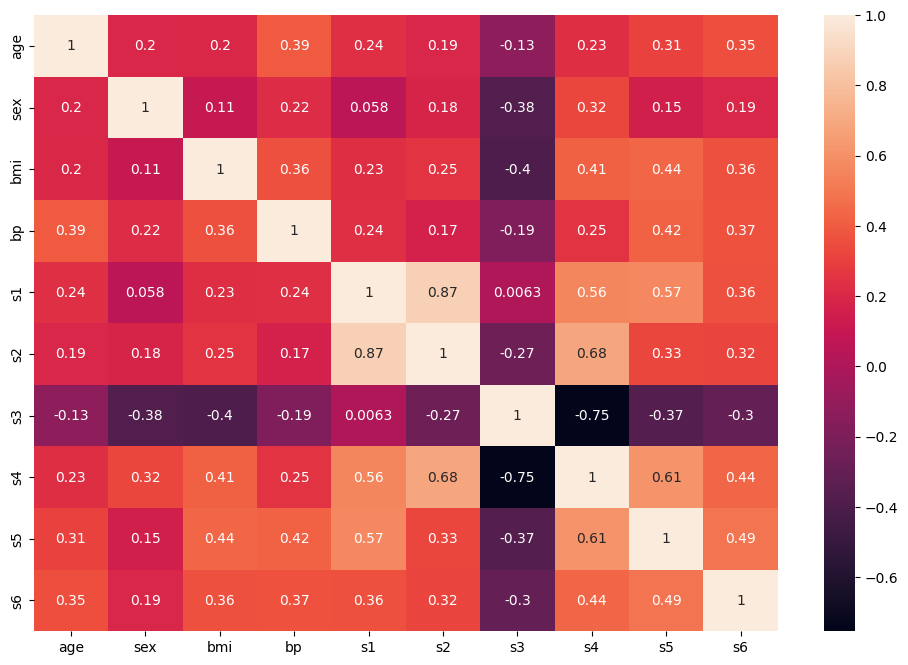

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(x_train.corr(), annot=True
            )

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
regressor= DecisionTreeRegressor()

In [25]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [26]:
params= {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' :['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [31]:
type(params)

dict

In [27]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = GridSearchCV(regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [35]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [36]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [37]:
y_pred = grid.predict(x_test)

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [41]:
print(mean_squared_error( y_test,y_pred))
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_pred, y_test)
      )

4881.6977726582445
57.59462364704344
-0.7204155279953439


In [44]:

selectmodel= DecisionTreeRegressor(criterion= 'squared_error',
 max_depth= 3,
 max_features= 'log2',
 splitter= 'best')


In [45]:
selectmodel.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2')

In [46]:
## visualization

from sklearn import tree

[Text(0.5, 0.875, 'x[6] <= -0.016\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[2] <= 0.056\nsquared_error = 5685.833\nsamples = 138\nvalue = 188.123'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= -0.01\nsquared_error = 4320.122\nsamples = 105\nvalue = 167.048'),
 Text(0.0625, 0.125, 'squared_error = 3749.108\nsamples = 43\nvalue = 138.093'),
 Text(0.1875, 0.125, 'squared_error = 3731.435\nsamples = 62\nvalue = 187.129'),
 Text(0.375, 0.375, 'x[3] <= 0.024\nsquared_error = 4121.118\nsamples = 33\nvalue = 255.182'),
 Text(0.3125, 0.125, 'squared_error = 5430.0\nsamples = 15\nvalue = 222.0'),
 Text(0.4375, 0.125, 'squared_error = 1348.25\nsamples = 18\nvalue = 282.833'),
 Text(0.75, 0.625, 'x[3] <= 0.037\nsquared_error = 3989.295\nsamples = 171\nvalue = 124.181'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.008\nsquared_error = 2886.691\nsamples = 143\nvalue = 111.965'),
 Text(0.5625, 0.125, 'squared_error = 2189.424\n

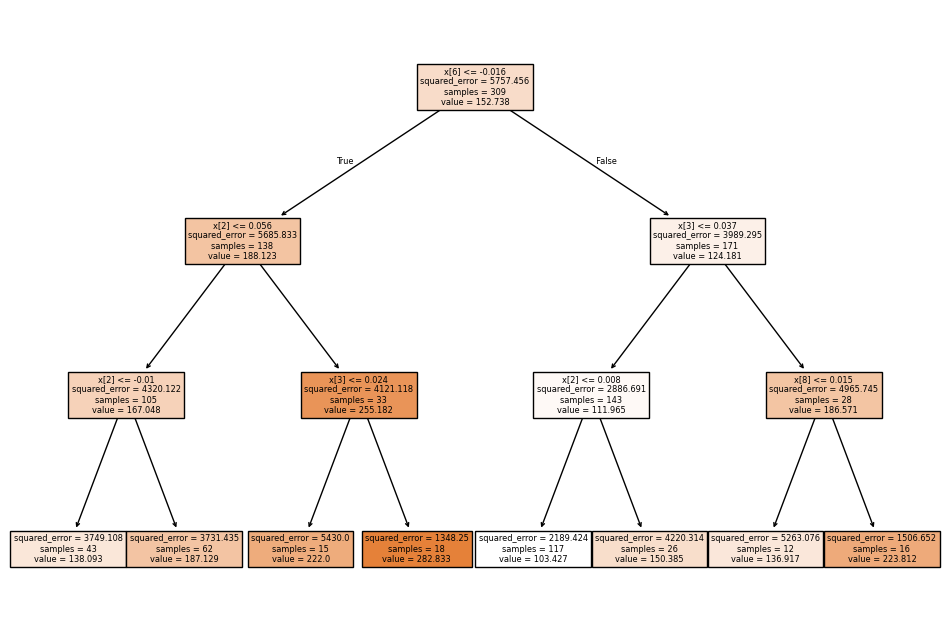

In [47]:
plt.figure(figsize=(12,8))
tree.plot_tree(selectmodel, filled=True)

In [48]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [51]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features='log2')

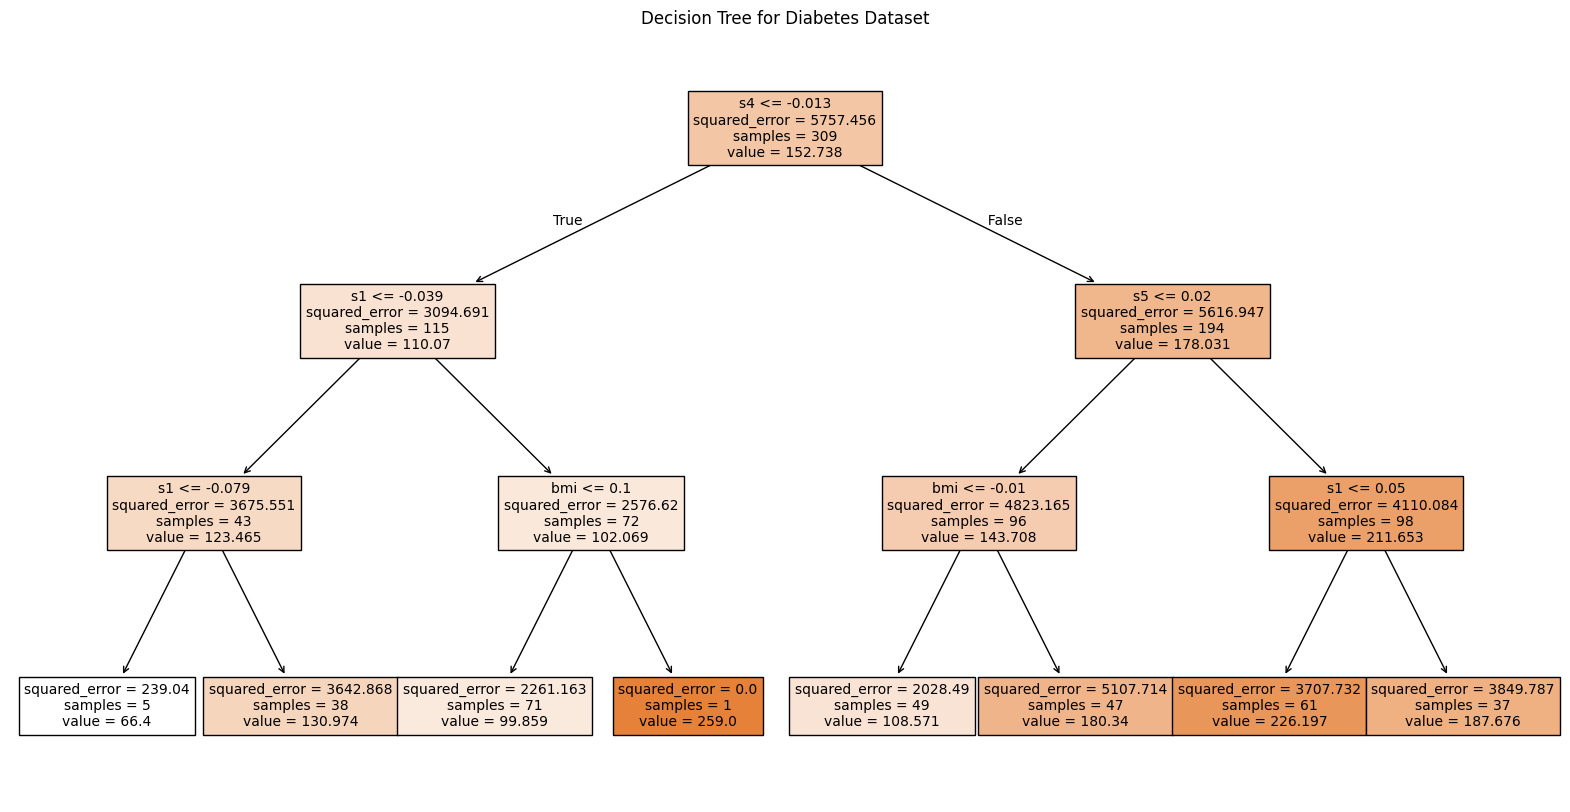

In [50]:
# Get the best model
best_model = grid.best_estimator_



# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=dataset.feature_names, filled=True)
plt.title("Decision Tree for Diabetes Dataset")
plt.show()